# Trending YouTube Video Statistics Analysis

### by Yueh-Han Chen

### Dataset Overview

> YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.


### Research Question:
1. Avereage views in each region
2. Average time for potential videos to get to trending in each region
3. Top 3 channels in each region measured by views and comments
4. What top 3 categories were the most popular in each regions by views
5. Throughout 2006 to 2018, which month produced most videos?

## Data Wrangling

### Gather

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [123]:
#load data
GB_df = pd.read_csv('GBvideos.csv') # Great Britain
IN_df = pd.read_csv('INvideos.csv') # India
JP_df = pd.read_csv('JPvideos.csv',encoding='latin1') # Japan
KR_df = pd.read_csv('KRvideos.csv',encoding='latin1') # Korea
RU_df = pd.read_csv('RUvideos.csv',encoding='latin1') # Russia
US_df = pd.read_csv('USvideos.csv') # USA

In [124]:
# Load all json and extract the data of categories that I want

import json

GB_cat={}
with open('GB_category_id.json') as f:
    GB_data = json.load(f)
for i in list(pd.DataFrame(GB_data['items']).id.values):
    GB_cat[i]=pd.DataFrame(GB_data['items'])[pd.DataFrame(GB_data['items']).id==i].snippet.values[0]['title']

IN_cat={}
with open('IN_category_id.json') as f:
    IN_data = json.load(f)
for i in list(pd.DataFrame(IN_data['items']).id.values):
    IN_cat[i]=pd.DataFrame(IN_data['items'])[pd.DataFrame(IN_data['items']).id==i].snippet.values[0]['title']
    
JP_cat={}
with open('JP_category_id.json') as f:
    JP_data = json.load(f)
for i in list(pd.DataFrame(JP_data['items']).id.values):
    JP_cat[i]=pd.DataFrame(JP_data['items'])[pd.DataFrame(JP_data['items']).id==i].snippet.values[0]['title']
    
KR_cat={}
with open('KR_category_id.json') as f:
    KR_data = json.load(f)
for i in list(pd.DataFrame(KR_data['items']).id.values):
    KR_cat[i]=pd.DataFrame(KR_data['items'])[pd.DataFrame(KR_data['items']).id==i].snippet.values[0]['title']
    
RU_cat={}
with open('RU_category_id.json') as f:
    RU_data = json.load(f)
for i in list(pd.DataFrame(RU_data['items']).id.values):
    RU_cat[i]=pd.DataFrame(RU_data['items'])[pd.DataFrame(RU_data['items']).id==i].snippet.values[0]['title']
    
US_cat={}
with open('US_category_id.json') as f:
    US_data = json.load(f)
for i in list(pd.DataFrame(US_data['items']).id.values):
    US_cat[i]=pd.DataFrame(US_data['items'])[pd.DataFrame(US_data['items']).id==i].snippet.values[0]['title']

### Data Assessing

In [125]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', -1)

Assess GB_df:

In [126]:
GB_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
35208,iWZmdoY1aTE,18.23.05,Ed Sheeran - Happier (Official Video),Ed Sheeran,10,2018-04-27T08:40:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cover""|""official""|""remix""|""official video""|""lyrics""|""session""|""ed sheeran happier""|""edsheeran happier""",68562625,1439388,35557,68910,https://i.ytimg.com/vi/iWZmdoY1aTE/default.jpg,False,False,False,÷. Out Now: https://atlanti.cr/yt-albumSubscribe to Ed's channel: http://bit.ly/SubscribeToEdSheeranFollow Ed on...Facebook: http://www.facebook.com/EdSheeranMusicTwitter: http://twitter.com/edsheeranInstagram: http://instagram.com/teddysphotosOfficial Website: http://edsheeran.com
9240,WS7f5xpGYn8,17.30.12,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,10,2017-12-20T20:00:02.000Z,"katy perry|""hey hey hey""|""official""|""music video""|""witness""|""can't break me""",27723596,770906,154663,77785,https://i.ytimg.com/vi/WS7f5xpGYn8/default.jpg,False,False,False,"Get Hey Hey Hey from Katy's new album 'Witness': http://katy.to/WitnessYd\nWITNESS: The Tour tickets available now! https://www.katyperry.com/tour\n\nDirected by Isaac Rentz\nProduced by Nina Dluhy-Miller & Danny Lockwood\n\nLyrics:\nA big beautiful brain with a pretty face, yeah\nA babydoll with a briefcase, yeah\nA hot little hurricane, ha\n'Cause I'm feminine and soft, but I'm still a boss, yeah\nRed lipstick but still so raw, yeah\nMarilyn Monroe in a monster truck\n\n'Cause I can be zen, and I can be the storm, yeah\nSmell like a rose, and I pierce like a thorn, yeah\nKarate chopping the clichés and norms all in a dress\n\nHey, hey, hey\nYou think that I'm a little baby\nYou think that I am fragile like a Fabergé\nYou think that I am cracking, but you can't break me\nNo, no way\nNo, no way\nNo, no way\nYou think that I am cracking, but you can't break me (break me)\n\nYeah, I bounce back like a pro 'cause I'm so resilient\nL-o-l at all your limits\nKeep your penny thoughts, I'm making a mint\n\n'Cause I can be zen, and I can be the storm, yeah\nSmell like a rose, and I pierce like a thorn, yeah\nKarate chopping the clichés and norms all in a dress\n\nHey, hey, hey\nYou think that I'm a little baby\nYou think that I am fragile like a Fabergé\nYou think that I am cracking, but you can't break me\nNo, no way\nNo, no way\nNo, no way\nYou think that I am cracking, but you can't break me (break me)\n\nI ain't got no strings (no strings, no strings, no strings)\nI'm no one's little puppet\nGot my own cha ching in my chubby little wallet\nAnd secretly you love it (you fucking love it)\nAnd secretly you love it\n\nHey, hey, hey\nYou think that I'm a little baby\nYou think that I am fragile like a Fabergé\nYou think that I am cracking, but you can't break me\nNo\nHey, hey, hey\nYou think that I'm a little baby\nYou think that I am fragile like a Fabergé\nYou think that I am cracking, but you can't break me\nNo, no way (no)\nNo, no way (no way)\nNo, no way (uh-uh)\nOh, you think that I am cracking, but you can't break me\n\nFollow Katy Perry:\nhttp://www.katyperry.com\nhttp://youtube.com/katyperry\nhttp://twitter.com/katyperry\nhttp://facebook.com/katyperry\nhttp://instagram.com/katyperry\n\nMusic video by Katy Perry performing Hey Hey Hey (C) 2017 Capitol Records\n\nhttp://vevo.ly/233WHW"
13771,I7B0z_2EZmQ,18.23.01,Regarding the rumors about me today,shane,23,2018-01-10T22:13:19.000Z,"shanedawsontv|""shane""|""dawson""|""vlogs""|""iphone""|""similar""|""to""|""jenna""|""marbles""|""smash""|""nigahiga""|""comedy""",6317102,606412,9336,205539,https://i.ytimg.com/vi/I7B0z_2EZmQ/default.jpg,False,False,False,.


In [127]:
GB_df.shape

(38916, 16)

In [128]:
GB_df.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [129]:
GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


In [130]:
GB_df[GB_df.duplicated()].shape[0]

171

In [131]:
GB_df.comments_disabled.value_counts()

False    38233
True     683  
Name: comments_disabled, dtype: int64

In [132]:
GB_df.ratings_disabled.value_counts()

False    38644
True     272  
Name: ratings_disabled, dtype: int64

In [133]:
GB_df.video_error_or_removed.value_counts()

False    38847
True     69   
Name: video_error_or_removed, dtype: int64

Assess IN_df:

In [134]:
IN_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
19639,rWVgT8Rbk-c,18.02.03,అసలు బోనీ కపూర్ ముంబాయి ఎందుకు వచ్చాడు..? శ్రీదేవి ని బాత్రూం లో ఎవరు చంపారు కారణం తెలిస్తే,We support you,22,2018-02-27T04:49:45.000Z,"sridevi funeral video|""sridevi funeral""|""sridevi daughter""|""we support you""|""channel""|""video""|""sridevi dead body in mumbai""|""sridevi dead body video""|""sridevi dead body live""|""sridevi death""|""boney kapoor family""|""boney kapoor on sridevi death""|""boney kapoor first wife funeral""|""sridevi death latest news""",1476561,0,0,0,https://i.ytimg.com/vi/rWVgT8Rbk-c/default.jpg,True,True,False,"Topic: అసలు బోనీ కపూర్ ముంబాయి ఎందుకు వచ్చాడు..? శ్రీదేవి ని బాత్రూం లో ఎవరు చంపారు కారం తెలిస్తే. Watch this video till the end and don't forget to subscribe our channel. Thanks for watching this video.\nOur Channel Description: \nWe support you is the channel which provides all the information regarding the health tips in telugu, mysterious, world, funny, shocking facts, weird, and latest tollywood updates along with all the updates from entertainment. It all also gives the information about the techniques which are useful to everyone. And it prepares a video as per user guidelines. Stay tuned to our channel for all the Telugu Movie News, Presenting information related to devotional bhakti spiritual, and also important content related to Lifestyle Education Technology Gadgets Automobile Beauty Glamour Facts. Please subscribe to our channel and refer your friends about this channel. watch this videos and share with them everywhere. we prepare videos as per your guidelines. We love to serve our best.........!\n(We support you for the right solution)\n\nBe a Lucky subscriber\nhttps://www.youtube.com/channel/UCvYTmg5i5GViJr3HpauJ26A?sub_confirmation=1\n??..............................................................??\nFollow me on facebook\nhttps://www.facebook.com/wesupportyu\n??..............................................................??\n\nLet me tweet you for new updates\nhttps://twitter.com/wesupportyoux7\n??..............................................................??\n\nLet's talk in the google plus\nhttps://plus.google.com/u/0/118289124853883415445\n\nPin us on pinterest\nhttps://www.pinterest.com/wesupportyu/"
7838,WV-IXl_fUxQ,17.25.12,"Deivamagal Episode 1422, 23/12/17",VikatanTV,43,2017-12-23T15:00:03.000Z,"deivamagal|""deiva magal""|""deiva magal serial""|""VikatanTV""|""deivamagal episode today""|""deivamagal today""|""deivamagal today episode""|""deivamagal episode 1422""|""deivamagal 23 December 2017""|""deiva magal serial 23.12.17""|""deiva magal episode 1422""|""தெய்வமகள்""|""devamagal""|""deivamagal episode""|""deviamagal""|""deivamahal""|""devaimagal""|""divamagal""",1122821,7839,1268,982,https://i.ytimg.com/vi/WV-IXl_fUxQ/default.jpg,False,False,False,Deivamagal Episode 1422\nSubscribe: https://goo.gl/eSvMiG Prev Episode: https://goo.gl/amK96A Priyamanaval Episode 898: https://goo.gl/iPj7Pi Best of Deivamagal: https://goo.gl/oWdXQ2 Best of Moorthy comedy: https://goo.gl/05WSN4 Deivamagal All Episodes: https://goo.gl/Z5L59u Deivamagal Title Song: https://goo.gl/1kRyA1 Deivamagal Romantic Song: https://goo.gl/Qq6x5B\nChannel: http://www.youtube.com/user/VikatanTV\nFacebook: https://www.facebook.com/deivamagal
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh Sanghera | Latest Punjabi Song 2017 | Speed Records,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music""|""punjabi bhangra music""|""punjabi latest songs""|""punjabi romantic songs""|""punjabi sad songs""|""punjabi""|""bhangra""|""latest punjabi songs 2017""|""punjab""|""desi""|""speed records""|""mankirt new song""|""daang""|""sukh sanghera""|""deep kahlon""|""mankirt aulakh""",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0En

In [135]:
IN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


In [136]:
IN_df[IN_df.duplicated()].shape[0]

4263

Assess JP_df:

In [137]:
JP_df[JP_df.duplicated()].shape[0]

5677

Assess KR_df:

In [138]:
KR_df[KR_df.duplicated()].shape[0]

2316

Assess RU_df:

In [139]:
RU_df[RU_df.duplicated()].shape[0]

46

Assess US_df:

In [140]:
US_df[US_df.duplicated()].shape[0]

48

### Assessment report:

General issues:

**Quality issues**

- The data type of category_id should be object instead of int
- Many duplicated rows including exactly same rows and same video but was recorded in dataset in different time
- The data type of trending_date and publish_time should be datetime instead of object

**Tidiness issues**

- not useful coulumns: 'thumbnail_link','tags', 'description'
- The data includes a category_id field, which varies between regions. The categories for a specific video in the associated JSON.
- Each region’s data is in a separate file. They should be joined together and created a 'region' column to specify what is the region each data from

### Data Cleaning

In [141]:
copy_GB = GB_df.copy() # Great Britain
copy_IN = IN_df.copy() # India
copy_JP = JP_df.copy() # Japan
copy_KR = KR_df.copy() # Korea
copy_RU = RU_df.copy() # Russia
copy_US = US_df.copy() # USA

**Tidiness issue: not useful columns: 'thumbnail_link','tags', 'description'**

**Define: Drop useless columns: 'thumbnail_link','tags', 'description'**

#### Code

In [142]:
# drop 'thumbnail_link','tags', 'description' columns
copy_GB.drop(['thumbnail_link','tags', 'description'], axis=1, inplace=True)
copy_IN.drop(['thumbnail_link','tags', 'description'], axis=1, inplace=True)
copy_JP.drop(['thumbnail_link','tags', 'description'], axis=1, inplace=True)
copy_KR.drop(['thumbnail_link','tags', 'description'], axis=1, inplace=True)
copy_RU.drop(['thumbnail_link','tags', 'description'], axis=1, inplace=True)
copy_US.drop(['thumbnail_link','tags', 'description'], axis=1, inplace=True)

#### Test

In [143]:
# if 'thumbnail_link','tags', 'description' still in the columns, print "wrong"
for i in ['thumbnail_link','tags', 'description']:
    if i in copy_GB.columns:
        print('Wrong')
    if i in copy_IN.columns:
        print('Wrong')
    if i in copy_JP.columns:
        print('Wrong')
    if i in copy_KR.columns:
        print('Wrong')
    if i in copy_RU.columns:
        print('Wrong')
    if i in copy_US.columns:
        print('Wrong')

**Tidiness issue: The data includes a category_id field, which varies between regions. The categories for a specific video in the associated JSON.**

**Define: convert each category_id to category from each JSON file**

#### Code

In [144]:
# Convert the data type of category_id from int to str
# map each category_id to category. 
# rename the category_id to category

copy_GB.category_id=copy_GB.category_id.astype(str)
copy_GB.category_id=copy_GB.category_id.map(GB_cat)
copy_GB.rename(columns={'category_id':'category'}, inplace=True)

copy_IN.category_id=copy_IN.category_id.astype(str)
copy_IN.category_id=copy_IN.category_id.map(IN_cat)
copy_IN.rename(columns={'category_id':'category'}, inplace=True)

copy_JP.category_id=copy_JP.category_id.astype(str)
copy_JP.category_id=copy_JP.category_id.map(JP_cat)
copy_JP.rename(columns={'category_id':'category'}, inplace=True)

copy_KR.category_id=copy_KR.category_id.astype(str)
copy_KR.category_id=copy_KR.category_id.map(KR_cat)
copy_KR.rename(columns={'category_id':'category'}, inplace=True)

copy_RU.category_id=copy_RU.category_id.astype(str)
copy_RU.category_id=copy_RU.category_id.map(RU_cat)
copy_RU.rename(columns={'category_id':'category'}, inplace=True)

copy_US.category_id=copy_US.category_id.astype(str)
copy_US.category_id=copy_US.category_id.map(US_cat)
copy_US.rename(columns={'category_id':'category'}, inplace=True)

#### Test

In [145]:
# print all the unique values in category columns in each dataset:
(copy_GB.category.unique(),
copy_IN.category.unique(),
copy_JP.category.unique(),
copy_KR.category.unique(),
copy_RU.category.unique(),
copy_US.category.unique())

(array(['Howto & Style', 'Entertainment', 'Music', 'Sports',
        'News & Politics', 'People & Blogs', 'Comedy',
        'Science & Technology', 'Pets & Animals', 'Education',
        'Film & Animation', 'Gaming', 'Autos & Vehicles',
        'Travel & Events', nan, 'Shows'], dtype=object),
 array(['Film & Animation', 'News & Politics', 'Entertainment', 'Comedy',
        'Music', 'People & Blogs', 'Travel & Events',
        'Science & Technology', 'Education', 'Howto & Style', 'Shows',
        'Sports', nan, 'Autos & Vehicles', 'Pets & Animals', 'Gaming',
        'Movies'], dtype=object),
 array(['News & Politics', 'Film & Animation', 'Science & Technology',
        'People & Blogs', 'Comedy', 'Travel & Events', 'Pets & Animals',
        'Entertainment', 'Howto & Style', 'Autos & Vehicles', 'Sports',
        nan, 'Music', 'Gaming', 'Education'], dtype=object),
 array(['People & Blogs', 'News & Politics', 'Sports', 'Travel & Events',
        'Comedy', 'Music', 'Entertainment', 'Pets &

**Tidiness issue: Each region’s data is in a separate file. They should be joined together and created a 'region' column to specify what is the region each data from**

**Define: use append to combine each dataset to one dataset as 'combined_df'**

#### Code

In [146]:
copy_GB['region'] = 'Great Britain'
copy_IN['region'] = 'India'
copy_JP['region'] = 'Japan'
copy_KR['region'] = 'Korea'
copy_RU['region'] = 'Russia'
copy_US['region'] = 'USA'

In [147]:
combined_df = copy_GB.append([copy_IN,copy_JP,copy_KR,copy_RU,copy_US], ignore_index=False, sort=False) 

In [148]:
copy_GB.shape[0]+copy_IN.shape[0]+copy_JP.shape[0]+copy_KR.shape[0]+copy_RU.shape[0]+copy_US.shape[0]

213046

#### Test

In [149]:
# find out the total rows added up by each dataset
copy_GB.shape[0]+copy_IN.shape[0]+copy_JP.shape[0]+copy_KR.shape[0]+copy_RU.shape[0]+copy_US.shape[0]

213046

In [150]:
# the rows of combined_df should be 213046
combined_df.shape[0]

213046

**Quality issue: Many duplicated rows**

**Define: use .drop_duplicated() to drop duplicated rows.**

#### Code

In [151]:
sum(combined_df.duplicated())

12521

In [152]:
sum(combined_df.duplicated(['title','publish_time']))

124510

In [153]:
combined_df=combined_df.drop_duplicates()
combined_df=combined_df.drop_duplicates(['title','publish_time'])

#### Test

In [154]:
sum(combined_df.duplicated()),sum(combined_df.duplicated(['title','publish_time']))

(0, 0)

**Quality issue: The data type of trending_date and publish_time should be datetime instead of object**

**Define: divide all str in trending_date into year, month, and date, then combine them together in the order that pandas understand as datetime, then convert the original datatype to datatime.**

#### Code

In [155]:
# divide all str in trending_date into year, month, and date, then combine them together.

combined_df['year'] = combined_df['trending_date'].apply(lambda x: '20'+x.split(".")[0])
combined_df['day'] = combined_df['trending_date'].apply(lambda x: x.split(".")[1])
combined_df['month'] = combined_df['trending_date'].apply(lambda x: x.split(".")[2])
combined_df['trending_date'] = combined_df['year']+combined_df['month']+combined_df['day']

In [156]:
# convert the original datatype  to datatime

combined_df.publish_time=combined_df.publish_time.astype('datetime64[ns]') 
combined_df.trending_date=combined_df.trending_date.astype('datetime64[ns]') 

In [157]:
# drop not useful columns: 'day'
combined_df.drop('day', axis=1, inplace=True)

#### Test

In [158]:
combined_df.publish_time.sample(10)

21792   2018-03-05 04:00:01
38405   2018-06-02 07:43:24
28653   2018-04-14 03:55:08
7435    2018-03-22 21:51:02
10548   2018-04-16 00:36:23
8916    2017-12-27 16:44:44
30225   2018-05-20 05:48:17
17583   2018-02-17 06:41:16
6356    2017-12-14 23:58:28
25883   2018-03-24 08:54:54
Name: publish_time, dtype: datetime64[ns]

In [159]:
combined_df.trending_date.sample(10)

28902   2018-04-15
24522   2018-03-18
8830    2017-12-28
14233   2018-01-30
39821   2018-06-10
20113   2018-02-24
1005    2017-11-19
12178   2018-01-19
10504   2018-01-05
13009   2018-01-20
Name: trending_date, dtype: datetime64[ns]

In [171]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88536 entries, 0 to 40766
Data columns (total 16 columns):
video_id                  88536 non-null object
trending_date             88536 non-null datetime64[ns]
title                     88536 non-null object
channel_title             88536 non-null object
category                  86983 non-null object
publish_time              88536 non-null datetime64[ns]
views                     88536 non-null int64
likes                     88536 non-null int64
dislikes                  88536 non-null int64
comment_count             88536 non-null int64
comments_disabled         88536 non-null bool
ratings_disabled          88536 non-null bool
video_error_or_removed    88536 non-null bool
region                    88536 non-null object
year                      88536 non-null object
month                     88536 non-null object
dtypes: bool(3), datetime64[ns](2), int64(4), object(7)
memory usage: 9.7+ MB


### Final step of Wrangling: Store data

In [172]:
# store the file
combined_df.reset_index(drop=True)
combined_df.to_csv('clean_df.csv')

In [5]:
#load data
clean_df = pd.read_csv('clean_df.csv')
clean_df.drop('Unnamed: 0', axis=1, inplace=True)
clean_df.publish_time=clean_df.publish_time.astype('datetime64[ns]') 
clean_df.trending_date=clean_df.trending_date.astype('datetime64[ns]') 

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88536 entries, 0 to 88535
Data columns (total 16 columns):
video_id                  88536 non-null object
trending_date             88536 non-null datetime64[ns]
title                     88536 non-null object
channel_title             88536 non-null object
category                  86983 non-null object
publish_time              88536 non-null datetime64[ns]
views                     88536 non-null int64
likes                     88536 non-null int64
dislikes                  88536 non-null int64
comment_count             88536 non-null int64
comments_disabled         88536 non-null bool
ratings_disabled          88536 non-null bool
video_error_or_removed    88536 non-null bool
region                    88536 non-null object
year                      88536 non-null int64
month                     88536 non-null int64
dtypes: bool(3), datetime64[ns](2), int64(6), object(5)
memory usage: 9.0+ MB


## Exploratory Data Analysis

> Build Visualization Function: desc()

In [7]:
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

## Research Question 1: Average views in each region

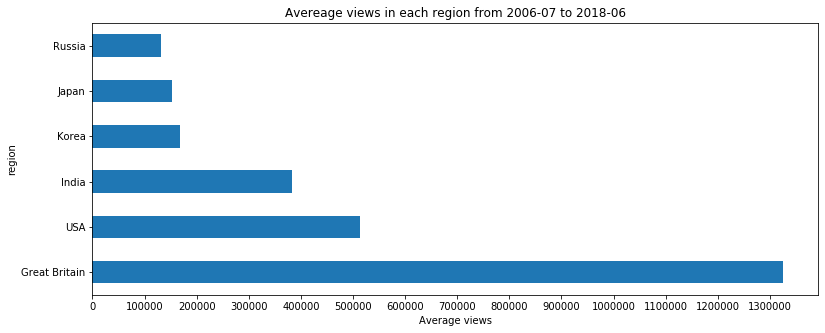

In [8]:
# use groupby to see eacch mean views of each region
plt.figure(figsize=(13,5))
clean_df.groupby('region').views.mean().sort_values(ascending=False).plot.barh()
desc(title='Avereage views in each region from 2006-07 to 2018-06',xticks1=range(0,1400000,100000),xticks2=range(0,1400000,100000),xlabel='Average views')

> Note: Great Britain's average views is near 1.3m, which is almost 3 times as much as USA's views.
And it would be interesting that if we divide the views by each population of region.

> The populatn of Great Britain, USA, India, Korea, Hapan, and Russia are 66.65, 328.2, 1353, 51.64, 126.5, 144.5, 

In [9]:
# save each values of views in a list
list1 = list(clean_df.groupby('region').views.mean().sort_values(ascending=False).values)

# Mutiply each population value to orignal value
list2 = [66.65, 328.2, 1353, 51.64, 126.5, 144.5]
list2 = [x * 1000000 for x in list2]

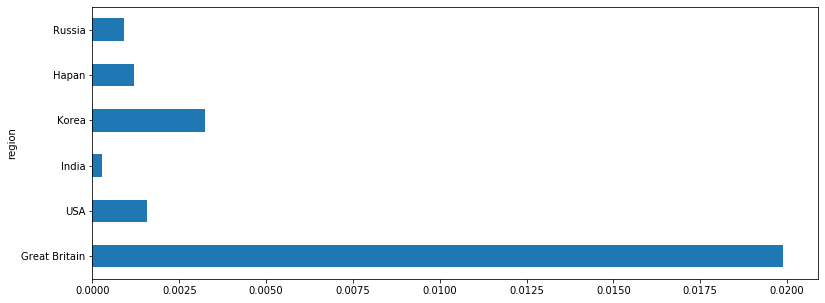

In [10]:
# get the views divided by population nad visulaize it
res = [i / j for i, j in zip(list1, list2)] 
data = {'views/population'     : res,
        'region'  : ['Great Britain', 'USA', 'India', 'Korea', 'Hapan', 'Russia']}
temp = pd.DataFrame(data)
temp = temp.set_index('region')
plt.figure(figsize=(13,5))
temp['views/population'].plot.barh();

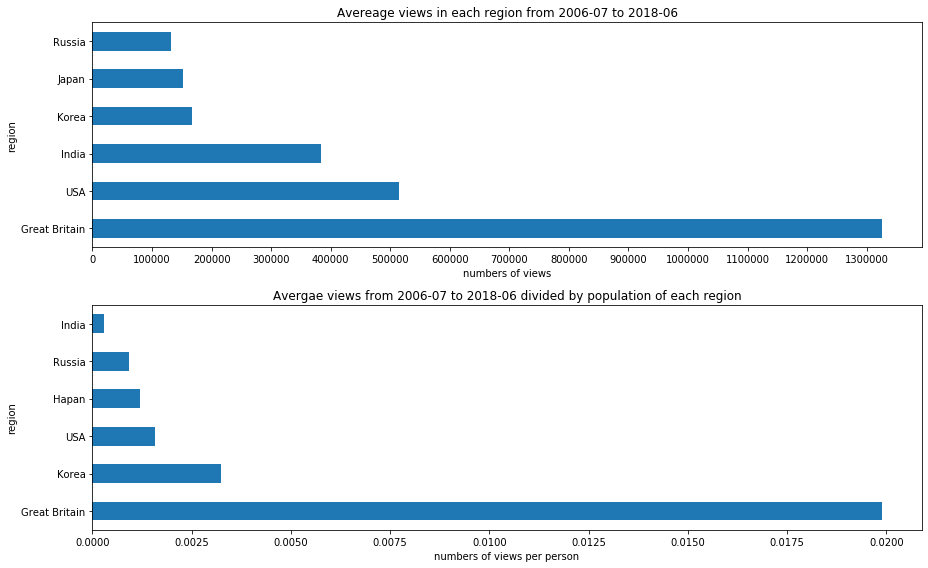

In [11]:
plt.figure(figsize=(13,8))
# combine these two graph
plt.subplot(2, 1, 1)

# use groupby to see eacch mean views of each region
clean_df.groupby('region').views.mean().sort_values(ascending=False).plot.barh()
desc(title='Avereage views in each region from 2006-07 to 2018-06',xticks1=range(0,1400000,100000),xticks2=range(0,1400000,100000),xlabel='numbers of views')

plt.subplot(2, 1, 2)
temp['views/population'].sort_values(ascending=False).plot.barh();
desc(title='Avergae views from 2006-07 to 2018-06 divided by population of each region', xlabel='numbers of views per person')
plt.tight_layout()

> Note: Great Britain got most views from 2006 to 2018. For numbers of views per person, Great Britain was still the first place, which was at least 5 times higher than the rest of the regions is this dataset.

## Research Question 2: Average time for potential videos to get to trending in each region

In [12]:
# find the time of every videos used to get trending and save those time to "Time_to_get_trending" column 
clean_df['Time_to_get_trending'] = clean_df['trending_date'] - clean_df['publish_time']
clean_df['Time_to_get_trending'] = clean_df['Time_to_get_trending'].apply(lambda x: x.days*24+x.seconds/3600)

In [13]:
# Examine the numbers in 'Time_to_get_trending' column
clean_df['Time_to_get_trending'].describe()

count     88536.000000
mean         98.812765
std        1921.537950
min         -20.843056
25%           8.333264
50%          13.146806
75%          19.999514
max      101151.596944
Name: Time_to_get_trending, dtype: float64

> Note: I found there are some negative numbers, which are not valid because usage of time cannot be negative.

In [14]:
# covert all the negative numbers to zero
clean_df['Time_to_get_trending'] = clean_df['Time_to_get_trending'].apply(lambda x: x if x >= 0 else 0 )

In [15]:
# Test the result
clean_df['Time_to_get_trending'].describe()

count     88536.000000
mean         99.039784
std        1921.525855
min           0.000000
25%           8.333264
50%          13.146806
75%          19.999514
max      101151.596944
Name: Time_to_get_trending, dtype: float64

> Note: I also found that there are few numbers are extremely high(outliers), so I decide to use 95% of the data to analyze the question 

In [16]:
clean_df['Time_to_get_trending'].quantile(0.95)

59.832430555555554

In [17]:
# We only need 95% of the data
temp_df = clean_df.query('Time_to_get_trending<60')

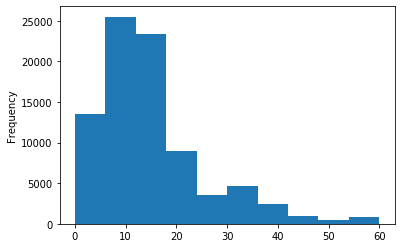

In [18]:
# Examine the distribution of it
temp_df['Time_to_get_trending'].plot.hist()

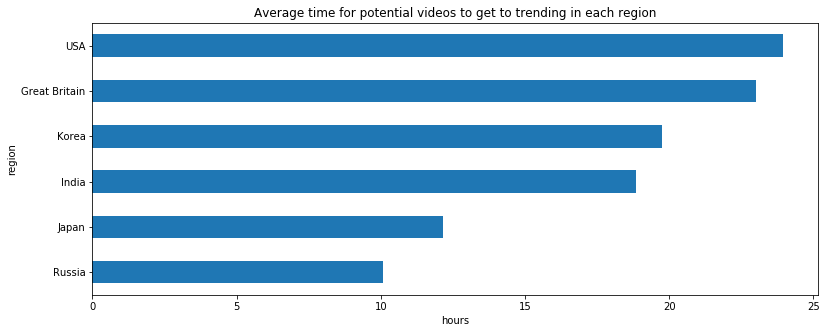

In [19]:
# Visualize it
plt.figure(figsize=(13,5))
temp_df.groupby('region').Time_to_get_trending.mean().sort_values().plot.barh();
desc(title='Average time for potential videos to get to trending in each region',xlabel='hours')

> Note: Average time for potential videos to get to trending in USA and Great Britain is around 22-25 hours, which is nearly two times as much as the average time in Japan and Russia.

## Research Question 3: Top 3 channels in each region measured by views and comment counts

In [88]:
# Find out what is thhe times number of the average number of divided by the average number of communt_count
# so that we can treat the number equally later on
clean_df.views.mean()/clean_df.comment_count.mean()

205.778232363023

> Note: the average number of views is 205 times as much as the one of comment counts.

In [89]:
# Views and Comment counts are both good metrics to judge if it is a popular video, 
# but views matter muchh more than comment counts, so I decide to give 80% weights to views and 20% weights to 
# comment counts to calculate the result numbers to find top channels 
clean_df['Popular_number'] = clean_df['views']*0.8 + clean_df['comment_count']*205*0.2

In [120]:
# Create dataframes for each region
Top_3_Channel_USA = pd.DataFrame(clean_df.query('region=="USA"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_USA['region'] = "USA"
Top_3_Channel_USA = Top_3_Channel_USA.reset_index()
Top_3_Channel_GB = pd.DataFrame(clean_df.query('region=="Great Britain"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_GB['region'] = "Great Britain"
Top_3_Channel_GB = Top_3_Channel_GB.reset_index()
Top_3_Channel_Japan = pd.DataFrame(clean_df.query('region=="Japan"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_Japan['region'] = "Japan"
Top_3_Channel_Japan = Top_3_Channel_Japan.reset_index()
Top_3_Channel_Korea = pd.DataFrame(clean_df.query('region=="Korea"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_Korea['region'] = "Korea"
Top_3_Channel_Korea = Top_3_Channel_Korea.reset_index()
Top_3_Channel_India = pd.DataFrame(clean_df.query('region=="India"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_India['region'] = "India"
Top_3_Channel_India = Top_3_Channel_India.reset_index()
Top_3_Channel_Russia = pd.DataFrame(clean_df.query('region=="Russia"').groupby('channel_title')['Popular_number'].mean().sort_values(ascending=False).head(3))
Top_3_Channel_Russia['region'] = "Russia"
Top_3_Channel_Russia = Top_3_Channel_Russia.reset_index()

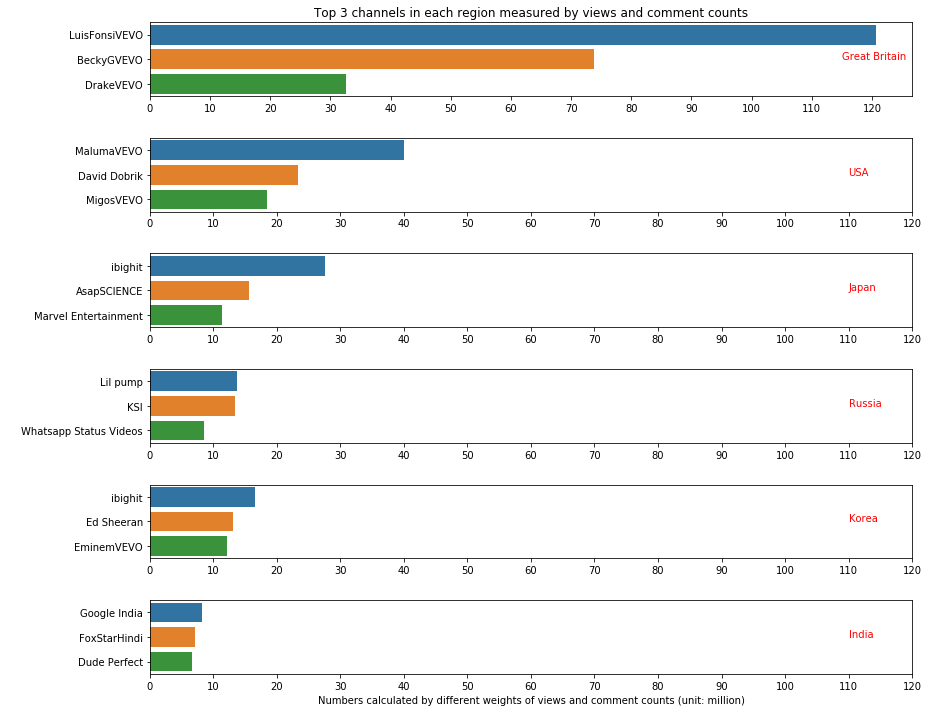

In [203]:
# Visualization!
plt.figure(figsize=(13,10))
plt.subplot(6, 1, 1)
sb.barplot(data = Top_3_Channel_GB, y = 'channel_title', x = 'Popular_number')
desc(title='Top 3 channels in each region measured by views and comment counts',ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Great Britain', xy=(115000000, 1), color='red')
plt.subplot(6, 1, 2)
sb.barplot(data = Top_3_Channel_USA, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('USA', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 3)
sb.barplot(data = Top_3_Channel_Japan, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Japan', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 4)
sb.barplot(data = Top_3_Channel_Russia, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Russia', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 5)
sb.barplot(data = Top_3_Channel_Korea, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel=" ", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('Korea', xy=(110000000, 1), color='red')
plt.subplot(6, 1, 6)
sb.barplot(data = Top_3_Channel_India, y = 'channel_title', x = 'Popular_number')
desc(ylabel=" ", xlabel="Numbers calculated by different weights of views and comment counts (unit: million)", xticks1=range(0,130000000,10000000), xticks2=range(0,130,10))
plt.annotate('India', xy=(110000000, 1), color='red')
plt.tight_layout()

> Note: In these 6 regions, Great Britain's top 3 channel got most views and comments, which are LuisFonsiVEVO, 
BeckyGVEVO, and DrakeVEVO.
All of them are singers' channels, and LuisFonsiVEVO's number calculated by 80% weight of views and 20% weights of comment counts was almost 4 times as many as DrakeVEVO.

## Research Question 4: What top 3 categories were the most popular in each regions by views

In [122]:
# Create dataframes of top 3 categories for each region
Top_3_category_USA = pd.DataFrame(clean_df.query('region=="USA"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_USA['region'] = "USA"
Top_3_category_USA = Top_3_category_USA.reset_index()
Top_3_category_GB = pd.DataFrame(clean_df.query('region=="Great Britain"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_GB['region'] = "Great Britain"
Top_3_category_GB = Top_3_category_GB.reset_index()
Top_3_category_Japan = pd.DataFrame(clean_df.query('region=="Japan"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_Japan['region'] = "Japan"
Top_3_category_Japan = Top_3_category_Japan.reset_index()
Top_3_category_Korea = pd.DataFrame(clean_df.query('region=="Korea"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_Korea['region'] = "Korea"
Top_3_category_Korea = Top_3_category_Korea.reset_index()
Top_3_category_India = pd.DataFrame(clean_df.query('region=="India"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_India['region'] = "India"
Top_3_category_India = Top_3_category_India.reset_index()
Top_3_category_Russia = pd.DataFrame(clean_df.query('region=="Russia"').groupby('category')['views'].mean().sort_values(ascending=False).head(3))
Top_3_category_Russia['region'] = "Russia"
Top_3_category_Russia = Top_3_category_Russia.reset_index()

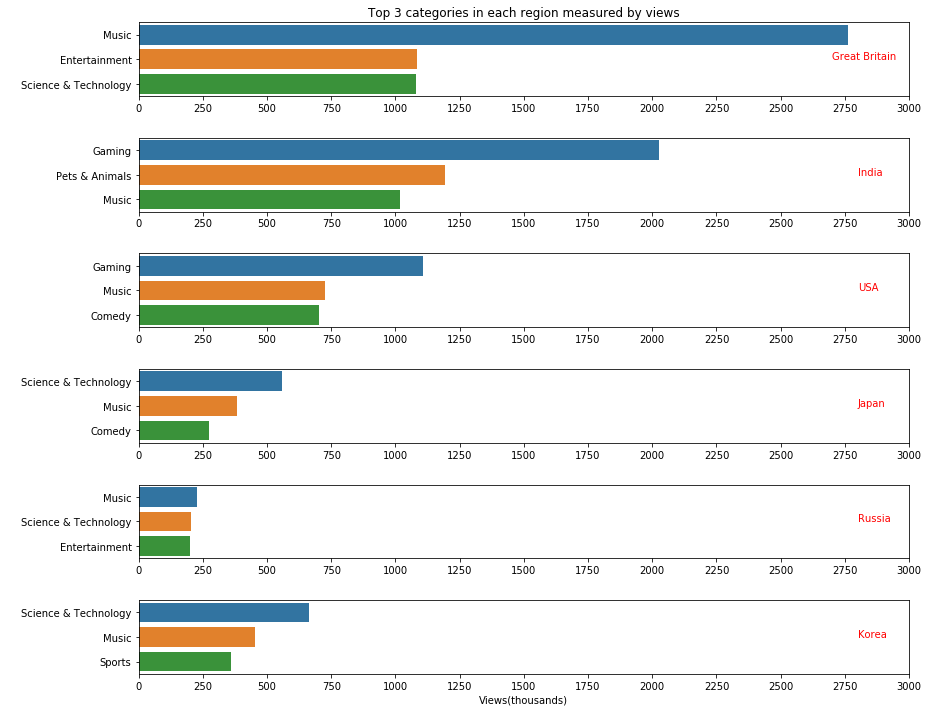

In [198]:
# Visualization!
plt.figure(figsize=(13,10))
plt.subplot(6, 1, 1)
sb.barplot(data = Top_3_category_GB, y = 'category', x = 'views')
desc(title='Top 3 categories in each region measured by views',ylabel=" ", xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Great Britain', xy=(2700000, 1), color='red')
plt.subplot(6, 1, 2)
sb.barplot(data = Top_3_category_India, y = 'category', x = 'views')
desc(ylabel=" ", xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('India', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 3)
sb.barplot(data = Top_3_category_USA, y = 'category', x = 'views')
desc(ylabel=" ", xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('USA', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 4)
sb.barplot(data = Top_3_category_Japan, y = 'category', x = 'views')
desc(ylabel=" ",xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Japan', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 5)
sb.barplot(data = Top_3_category_Russia, y = 'category', x = 'views')
desc(ylabel=" ",xlabel=" ",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Russia', xy=(2800000, 1), color='red')
plt.subplot(6, 1, 6)
sb.barplot(data = Top_3_category_Korea, y = 'category', x = 'views')
desc(ylabel=" ", xlabel="Views(thousands)",xticks1=range(0,3100000,250000),xticks2=range(0,3100,250))
plt.annotate('Korea', xy=(2800000, 1), color='red')
plt.tight_layout()

> Note: Music is the popular category that is in top 3 category in each region. In Great Britain, music got average 2750 k views, which is over 2 times as many a the rest of two in the top 3. Besides, gaming is a special category that got the highest average views in India and USA, and which is even not in top 3 list in the rest regions in the dataset.

## Research Question 5: Throughout 2006 to 2018, which month produced most videos?

In [209]:
# Let's examine the completeness of each month
clean_df.month.unique()

array([11, 12,  1,  2,  3,  4,  5,  6])

> Note: I found that the dataset missed the data from July to October, so this analysis is gonna to be only based on January to June, November and December.

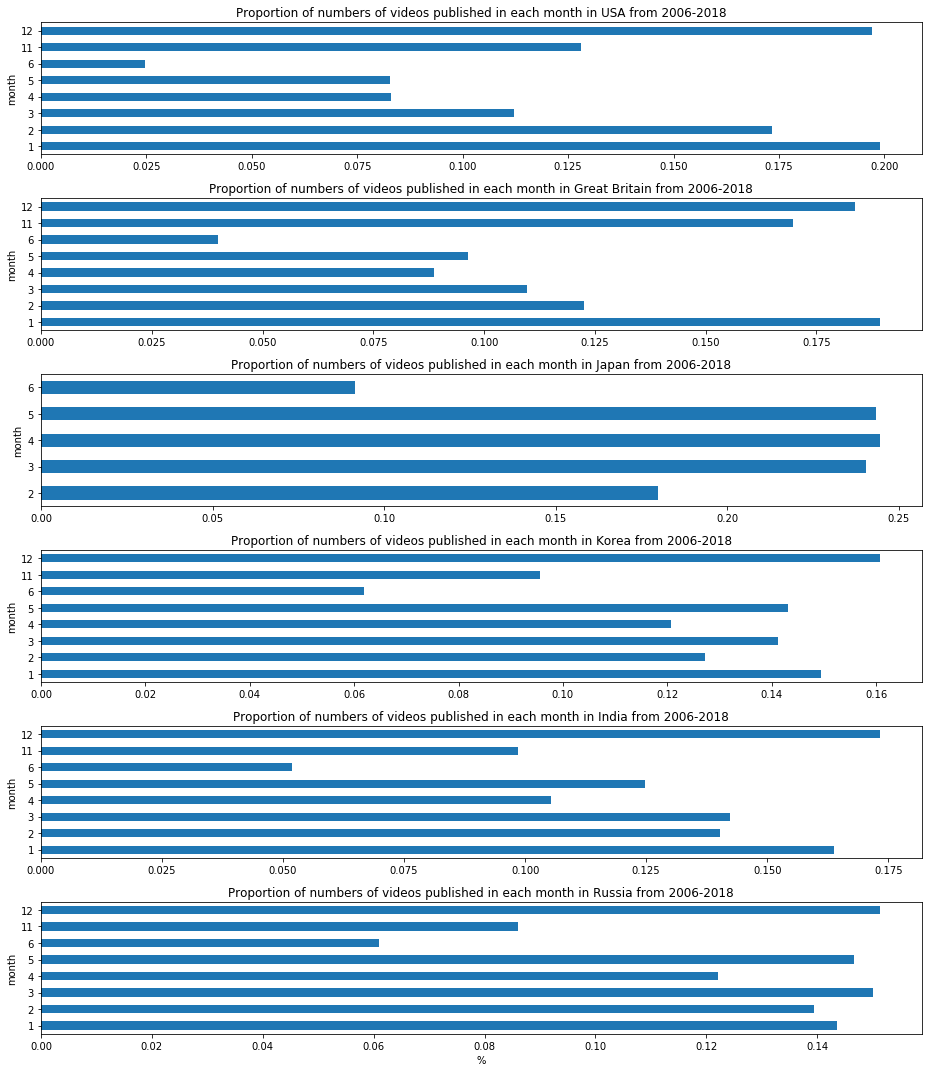

In [248]:
# Visualization!
plt.figure(figsize=(13,15))
plt.subplot(6, 1, 1)
(clean_df.query('region=="USA"').groupby('month').video_id.count()/clean_df.query('region=="USA"').shape[0]).plot.barh()
desc(title='Proportion of numbers of videos published in each month in USA from 2006-2018')
plt.subplot(6, 1, 2)
(clean_df.query('region=="Great Britain"').groupby('month').video_id.count()/clean_df.query('region=="Great Britain"').shape[0]).plot.barh()
desc(title='Proportion of numbers of videos published in each month in Great Britain from 2006-2018')
plt.subplot(6, 1, 3)
(clean_df.query('region=="Japan"').groupby('month').video_id.count()/clean_df.query('region=="Japan"').shape[0]).plot.barh()
desc(title='Proportion of numbers of videos published in each month in Japan from 2006-2018')
plt.subplot(6, 1, 4)
(clean_df.query('region=="Korea"').groupby('month').video_id.count()/clean_df.query('region=="Korea"').shape[0]).plot.barh()
desc(title='Proportion of numbers of videos published in each month in Korea from 2006-2018')
plt.subplot(6, 1, 5)
(clean_df.query('region=="India"').groupby('month').video_id.count()/clean_df.query('region=="India"').shape[0]).plot.barh()
desc(title='Proportion of numbers of videos published in each month in India from 2006-2018')
plt.subplot(6, 1, 6)
(clean_df.query('region=="Russia"').groupby('month').video_id.count()/clean_df.query('region=="Russia"').shape[0]).plot.barh()
desc(title='Proportion of numbers of videos published in each month in Russia from 2006-2018', xlabel='%')
plt.tight_layout()

> Note: Around 6 regions, people tended to published less video in June, and pubished most in January or December.

## Conclusion

> Limitation 1 : Youtube videos has **long tail effect**, which means some videos was not be popular at first, but might be popular in years so that the rank of each popular videos listed above might changed now. For example, the video "The Poop In My Pants | Rick and Morty | Adult Swim" had only near 2 millions views in this dataset, but it has 7 millions views now in 2020.

> Limitation 2 : There are some most important metrics of youtube like **Watch Time, unique views, and share counts**, but we don't have each of those information in the dataset so that based on the information given by the dataset to make decision about video creation will be some degree wrong.

> Limitation 3 : Average time for potential videos to get to trending in each region is based on 95% of the data because the 5% of the data is extremely high, therefore if someone use this analysis to predict the time of their videos to get to trending, it would be 5% degree wrong.

> Limitation 4 : The dataset missed the data from July to October, so the final analysis is only based on January to June, November and December.

#### Research Question 1: Avereage views in each region

- Great Britain got most views from 2006 to 2018. For numbers of views per person, Great Britain was still the first place, which was at least 5 times higher than the rest of the regions is this dataset.

#### Research Question 2: Average time for potential videos to get to trending in each region

- Average time for potential videos to get to trending in USA and Great Britain is around 22-25 hours, which is nearly two times as much as the average time in Japan and Russia.
       
#### Research Question 3: Top 3 channels in each region measured by views and comments

- In these 6 regions, Great Britain's top 3 channel got most views and comments, which are LuisFonsiVEVO, BeckyGVEVO, and DrakeVEVO. All of them are singers' channels, and LuisFonsiVEVO's number calculated by 80% weight of views and 20% weights of comment counts was almost 4 times as many as DrakeVEVO.

#### Research Question 4: What top 3 categories were the most popular in each regions by views

- Music is the popular category that is in top 3 category in each region. In Great Britain, music got average 2750 k views, which is over 2 times as many a the rest of two in the top 3. Besides, gaming is a special category that got the highest average views in India and USA, and which is even not in top 3 list in the rest regions in the dataset.

#### Research Question 5: Throughout 2006 to 2018, which month produced most videos?

- Around 6 regions, people tended to published less video in June, and pubished most in January or December.